In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

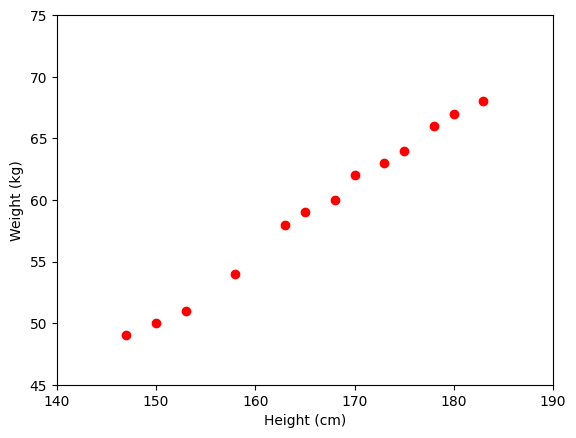

In [2]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize the data
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


w =  [[-33.73541021]
 [  0.55920496]]


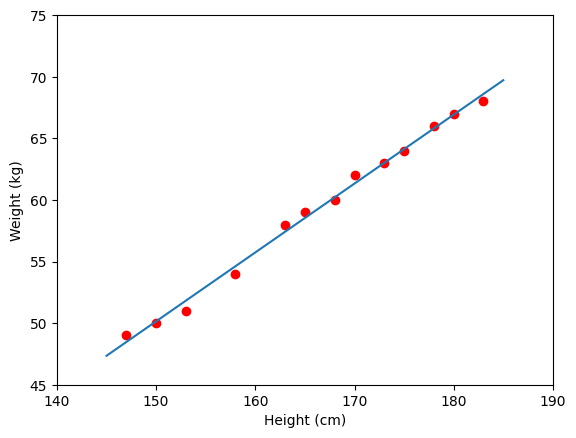

In [3]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis=1)

# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line
plt.plot(X.T, y.T, 'ro') # data
plt.plot(x0, y0)    # fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [4]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )

Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)


In [8]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5)           : ', w.T)

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Solution found by (5)           :  [[-33.73541021   0.55920496]]


In [9]:
from sklearn import datasets, linear_model
# fit the model by Linear Regression
regr = linear_model.LinearRegression()
regr.fit(X, y) # in scikit-learn, each sample is one row
# Compare two results
print("scikit-learn’s solution : w_1 = ", regr.coef_[0], "w_0 = ", regr.intercept_)
print("our solution            : w_1 = ", w[1], "w_0 = ", w[0])

scikit-learn’s solution : w_1 =  [0.55920496] w_0 =  [-33.73541021]
our solution            : w_1 =  [0.55920496] w_0 =  [-33.73541021]


### Linear Regression rất nhạy cảm với nhiễu
Trong trường hợp có _nhiễu_, với một cặp dữ liệu (150 cm, 70kg), kết quả đã sai lệch đi rất nhiều.

w =  [22.21867545  0.23775985]


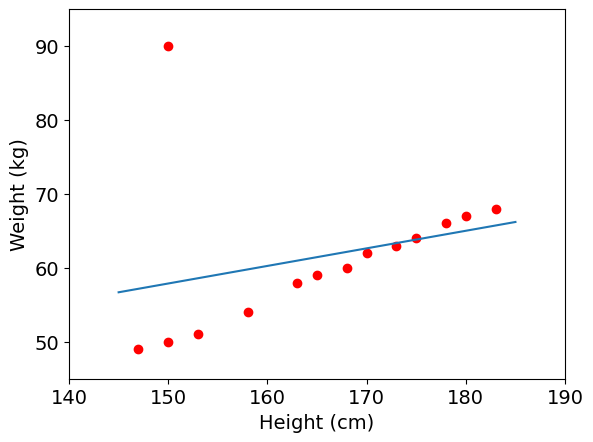

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183, 150]]).T
# weight (kg)
y = np.array([ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68, 90])

# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line 
w_0 = w[0]
w_1 = w[1]
x0 = np.linspace(145, 185, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X, y, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 95])
plt.xlabel('Height (cm)', fontsize = 14)
plt.ylabel('Weight (kg)', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=14)
with PdfPages('noise.pdf') as pdf:
    pdf.savefig(bbox_inches='tight')
plt.show()

# Polynomial Regression 